# Lyric Preprocessing

In [15]:
import pandas as pd

df = pd.read_csv('../billboard_lyrics_1960-2024.csv')

print(df.isnull().sum())

df = df.dropna(subset=['lyrics'])

df.head()

year       0
rank       0
title      0
artist     0
url        3
lyrics    94
dtype: int64


,year,rank,title,artist,url,lyrics
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,There's a summer place\nWhere it may rain or s...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,[Verse 1]\nPut your sweet lips a little closer...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,[Chorus]\nDon't want your love anymore\nDon't ...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o..."


In [16]:
# drop same title and artist
df = df.drop_duplicates(subset=['title', 'artist'], keep='last')

In [17]:
df['lyrics_ori'] = df['lyrics']
df['lyrics'] = df['lyrics'].str.lower()

df.head()

,year,rank,title,artist,url,lyrics,lyrics_ori
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,there's a summer place\nwhere it may rain or s...,There's a summer place\nWhere it may rain or s...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,[verse 1]\nput your sweet lips a little closer...,[Verse 1]\nPut your sweet lips a little closer...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,[chorus]\ndon't want your love anymore\ndon't ...,[Chorus]\nDon't want your love anymore\nDon't ...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,[intro]\n*vocalizations*\n[verse 1]\non the ba...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,"[intro]\nteen angel\nteen angel\nteen angel, o...","[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o..."


In [18]:
import re

def remove_special_chars(text):
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['lyrics'] = df['lyrics'].apply(remove_special_chars)

df.head()

,year,rank,title,artist,url,lyrics,lyrics_ori
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o..."


In [19]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
df['lyrics_tokens'] = df['lyrics'].apply(word_tokenize)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"[theres, a, summer, place, where, it, may, rai..."
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"[put, your, sweet, lips, a, little, closer, to..."
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"[dont, want, your, love, anymore, dont, want, ..."
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"[vocalizations, on, the, bank, of, the, river,..."
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","[teen, angel, teen, angel, teen, angel, ooh, t..."


In [20]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['lyrics_tokens'] = df['lyrics_tokens'].apply(lambda x: [item for item in x if item not in stop_words])

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"[theres, summer, place, may, rain, storm, yet,..."
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"[put, sweet, lips, little, closer, phone, lets..."
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"[dont, want, love, anymore, dont, want, kisses..."
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"[vocalizations, bank, river, stood, running, b..."
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","[teen, angel, teen, angel, teen, angel, ooh, f..."


In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['lyrics_tokens'] = df['lyrics_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"[there, summer, place, may, rain, storm, yet, ..."
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"[put, sweet, lip, little, closer, phone, let, ..."
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"[dont, want, love, anymore, dont, want, kiss, ..."
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"[vocalization, bank, river, stood, running, be..."
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","[teen, angel, teen, angel, teen, angel, ooh, f..."


In [22]:
from collections import Counter
df['lyrics_cleaned'] = df['lyrics_tokens'].apply(lambda x: ' '.join(x))
common_phrases = Counter(" ".join(df['lyrics_cleaned']).split()).most_common(20)
print(common_phrases)

[('love', 9649), ('im', 8550), ('dont', 7439), ('know', 7310), ('like', 6557), ('got', 5357), ('baby', 5160), ('oh', 5087), ('yeah', 5069), ('na', 4972), ('go', 4849), ('say', 4795), ('get', 4632), ('time', 4228), ('one', 4219), ('youre', 4026), ('come', 3693), ('let', 3568), ('want', 3502), ('see', 3372)]


In [23]:
all_words = [word for tokens in df['lyrics_tokens'] for word in tokens]
word_freq = Counter(all_words)

print(word_freq.most_common(10))
print(word_freq.most_common()[:-10-1:-1])

[('love', 9649), ('im', 8550), ('dont', 7439), ('know', 7310), ('like', 6557), ('got', 5357), ('baby', 5160), ('oh', 5087), ('yeah', 5069), ('na', 4972)]
[('petulance', 1), ('thеyve', 1), ('pbr', 1), ('mеan', 1), ('authentic', 1), ('projection', 1), ('unpolite', 1), ('ninefifty', 1), ('fraternal', 1), ('twinnin', 1)]


In [24]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df['is_english'] = df['lyrics'].apply(is_english)

df.head()

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned,is_english
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"[there, summer, place, may, rain, storm, yet, ...",there summer place may rain storm yet im safe ...,True
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"[put, sweet, lip, little, closer, phone, let, ...",put sweet lip little closer phone let pretend ...,True
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"[dont, want, love, anymore, dont, want, kiss, ...",dont want love anymore dont want kiss thats su...,True
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"[vocalization, bank, river, stood, running, be...",vocalization bank river stood running bear you...,True
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","[teen, angel, teen, angel, teen, angel, ooh, f...",teen angel teen angel teen angel ooh fateful n...,True


In [25]:
df[df['is_english'] == False]

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned,is_english
78,1960,79,Cherry Pie,Skip & Flip,https://genius.com/Skip-and-flip-cherry-pie-ly...,nah nah nah\nnah nah nah whoaoh whoaoh\nnah na...,"Nah, nah, nah\nNah, nah, nah, whoa-oh, whoa-oh...","[nah, nah, nah, nah, nah, nah, whoaoh, whoaoh,...",nah nah nah nah nah nah whoaoh whoaoh nah nah ...,False
143,1961,44,Asia Minor,Kokomo,https://genius.com/Imperial-circus-dead-decade...,moumokuteki na monjin ni chi ga rakurui\nmoya ...,「Moumokuteki na monjin ni chi ga rakurui\nMoya...,"[moumokuteki, na, monjin, ni, chi, ga, rakurui...",moumokuteki na monjin ni chi ga rakurui moya g...,False
173,1961,74,I've Told Every Little Star,Linda Scott,https://genius.com/Linda-scott-ive-told-every-...,\ndum dadum\ndadadadadadadada\ndum dadum\ndada...,"[Intro]\nDum, da-dum\nDa-da-da-da-da-da-da-da\...","[dum, dadum, dadadadadadadada, dum, dadum, dad...",dum dadum dadadadadadadada dum dadum dadadadad...,False
250,1962,51,Smoky Places,The Corsairs,https://genius.com/Tino-el-pinguino-lo-juro-mi...,\n\ncon maiky nav con maiky nav con maiky nav\...,"[Letra de ""Lo juro, mi ex novia era un X-Men""]...","[con, maiky, nav, con, maiky, nav, con, maiky,...",con maiky nav con maiky nav con maiky nav smok...,False
309,1963,10,Sukiyaki,Kyu Sakamoto,https://genius.com/Kyu-sakamoto-sukiyaki-lyrics,\n\n上を向いて歩こう\n涙がこぼれないように\n思い出す春の日\n一人ぼっちの夜\n\n...,[坂本九「上を向いて歩こう」歌詞]\n[Verse 1]\n上を向いて歩こう\n涙がこぼれな...,"[上を向いて歩こう, 涙がこぼれないように, 思い出す春の日, 一人ぼっちの夜, 上を向いて...",上を向いて歩こう 涙がこぼれないように 思い出す春の日 一人ぼっちの夜 上を向いて歩こう に...,False
...,...,...,...,...,...,...,...,...,...,...
6471,2024,71,Everybody,Nicki Minaj featuring Lil Uzi Vert,https://genius.com/Genius-brasil-traducoes-nic...,\nhumm\nvocê não é de gangue se deixa coisas p...,[Intro: Nicki Minaj]\nHumm\nVocê não é de gang...,"[humm, você, não, é, de, gangue, se, deixa, co...",humm você não é de gangue se deixa coisas pass...,False
6472,2024,72,La Diabla,Xavi,https://genius.com/Xavi-mex-la-diabla-lyrics,\n\ny yo puedo comerte como a ti te gusta\nsi ...,"[Letra de ""La Diabla""]\n[Verso]\nY yo puedo co...","[yo, puedo, comerte, como, ti, te, gusta, si, ...",yo puedo comerte como ti te gusta si solo te d...,False
6481,2024,81,High Road,Koe Wetzel featuring Jessie Murph,https://genius.com/Genius-traducciones-al-espa...,\n\npuedo decir que estás enfadado\ny no me so...,"[Letra de ""Koe Wetzel - High Road (Ft. Jessie ...","[puedo, decir, que, estás, enfadado, sorprende...",puedo decir que estás enfadado sorprende ni la...,False
6482,2024,82,Monaco,Bad Bunny,https://genius.com/Bad-bunny-monaco-lyrics,\n\nhuhhuhhuh\nhuhhuhhuhhuh\nhuhhuhhuhhuh\nhuh...,"[Letra de ""MONACO""]\n[Intro]\nHuh-huh-huh\nHuh...","[huhhuhhuh, huhhuhhuhhuh, huhhuhhuhhuh, huhhuh...",huhhuhhuh huhhuhhuhhuh huhhuhhuhhuh huhhuhhuhh...,False


In [26]:
# drop non-english lyrics
df = df[df['is_english']]
df = df.drop(columns=['is_english'])

df.head()

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"[there, summer, place, may, rain, storm, yet, ...",there summer place may rain storm yet im safe ...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"[put, sweet, lip, little, closer, phone, let, ...",put sweet lip little closer phone let pretend ...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"[dont, want, love, anymore, dont, want, kiss, ...",dont want love anymore dont want kiss thats su...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"[vocalization, bank, river, stood, running, be...",vocalization bank river stood running bear you...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","[teen, angel, teen, angel, teen, angel, ooh, f...",teen angel teen angel teen angel ooh fateful n...


In [27]:
# save to csv
df.to_csv('../data/billboard_lyrics_1960-2024_cleaned.csv', index=False)

# Difficulty

In [28]:
import pandas as pd

df2 = pd.read_csv('../data/billboard_lyrics_1960-2024_cleaned.csv')
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...


In [29]:
from textstat import flesch_kincaid_grade
from difficulty import lexical_density, average_sentence_length, type_token_ratio, word_difficulty

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HUAWEI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [30]:
def average_word_difficulty(words):
    return sum([word_difficulty(word) for word in words]) / len(words)

In [31]:
df2['readability'] = df2['lyrics'].apply(flesch_kincaid_grade)
df2['lexical_density'] = df2['lyrics'].apply(lexical_density)
df2['sentence_complexity'] = df2['lyrics'].apply(average_sentence_length)
df2['lexical_diversity'] = df2['lyrics_cleaned'].apply(type_token_ratio)

In [32]:
df2['word_difficulty'] = df2['lyrics_tokens'].apply(average_word_difficulty)
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned,readability,lexical_density,sentence_complexity,lexical_diversity,word_difficulty
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...,38.0,0.461538,104.0,0.659574,2.842233
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...,56.7,0.572368,152.0,0.589041,2.646774
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...,53.6,0.689655,145.0,0.455556,2.873184
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...,46.9,0.661157,121.0,0.583333,2.936652
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...,40.3,0.588785,107.0,0.627451,2.991189


In [33]:
# standardize readability, lexical_density, sentence_complexity, lexical_diversity, word_difficulty
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty']] = scaler.fit_transform(df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty']])
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned,readability,lexical_density,sentence_complexity,lexical_diversity,word_difficulty
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...,-0.060007,-2.143354,-0.058676,0.152713,0.268202
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...,-0.035813,-0.575882,-0.034457,-0.323078,-0.960524
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...,-0.039823,1.082909,-0.037989,-1.223520,0.462769
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...,-0.048492,0.679859,-0.050098,-0.361580,0.861752
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...,-0.057031,-0.343701,-0.057162,-0.063980,1.204597


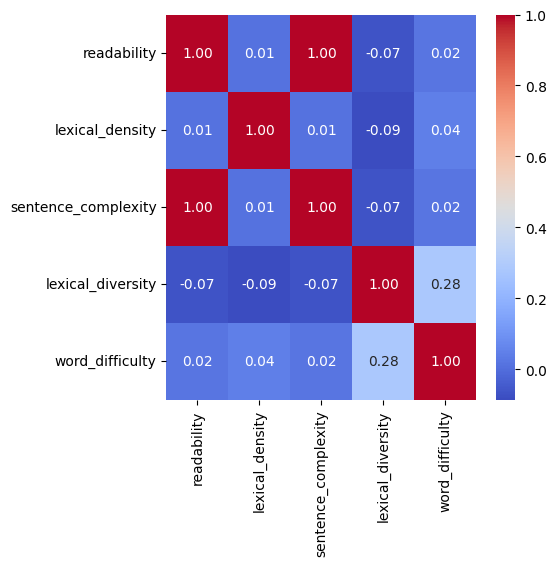

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
# values range from -1 to 1
sns.heatmap(df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [35]:
# lyrics difficulty = readability + lexical_density + lexical_diversity + word_difficulty
df2['lyrics_difficulty'] = df2['readability'] + df2['lexical_density'] + df2['lexical_diversity'] + df2['word_difficulty']

# standardize
df2['lyrics_difficulty'] = (df2['lyrics_difficulty'] - df2['lyrics_difficulty'].mean()) / df2['lyrics_difficulty'].std()

<Figure size 1000x1000 with 0 Axes>

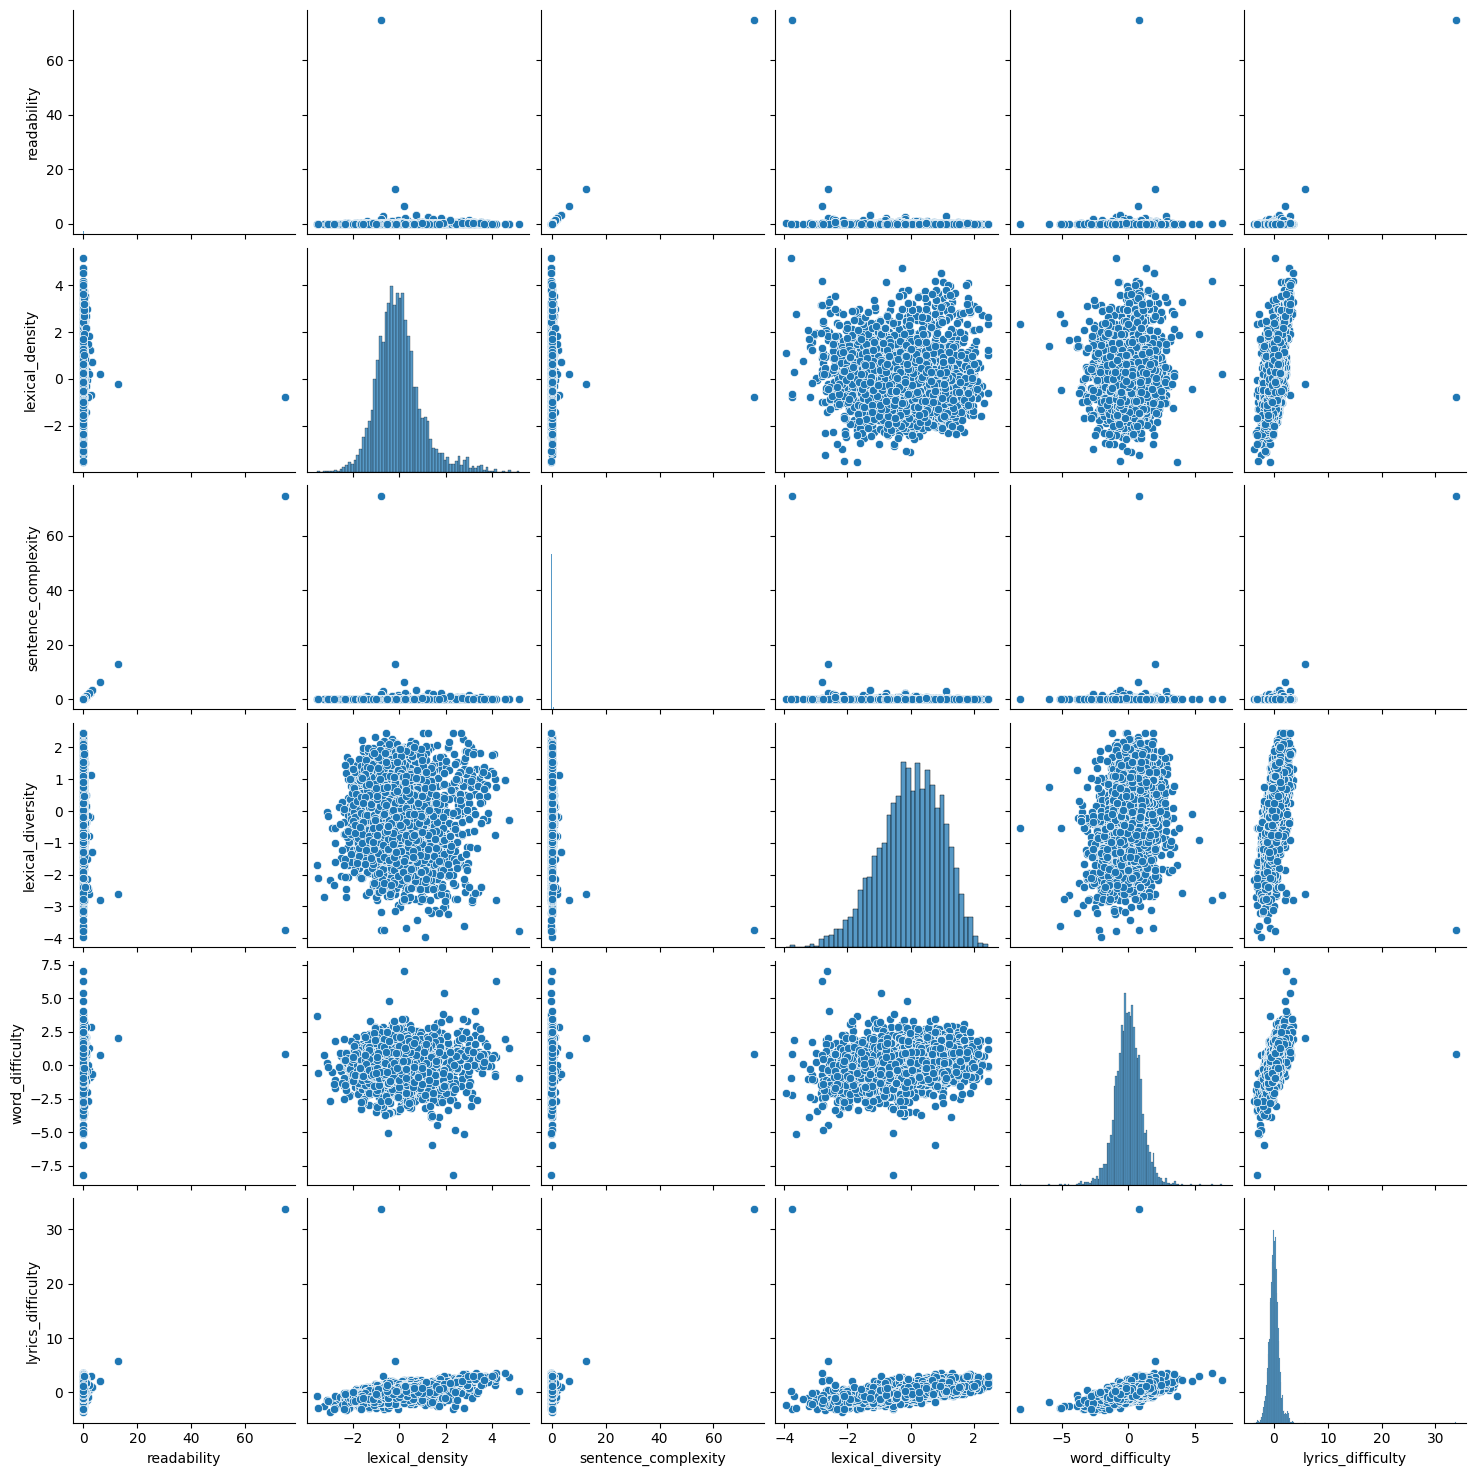

In [36]:
# crossplot of readability, lexical density, sentence complexity, lexical diversity, word difficulty, and lyrics difficulty
plt.figure(figsize=(10, 10))
sns.pairplot(df2[['readability', 'lexical_density', 'sentence_complexity', 'lexical_diversity', 'word_difficulty', 'lyrics_difficulty']])
plt.show()

In [38]:
df2.describe()

,year,rank,readability,lexical_density,sentence_complexity,lexical_diversity,word_difficulty,lyrics_difficulty
count,5923.000000,5923.000000,5.923000e+03,5.923000e+03,5.923000e+03,5.923000e+03,5.923000e+03,5.923000e+03
mean,1990.931791,50.711464,-2.399266e-18,7.965564e-16,-1.799450e-18,-2.111354e-16,1.631501e-15,-1.919413e-17
std,18.398551,28.836465,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000084e+00,1.000000e+00
min,1960.000000,1.000000,-1.080076e-01,-3.542115e+00,-1.076182e-01,-3.966572e+00,-8.169567e+00,-3.741405e+00
25%,1975.000000,26.000000,-4.849204e-02,-6.287903e-01,-4.858437e-02,-6.466047e-01,-6.007391e-01,-5.530849e-01
50%,1990.000000,51.000000,-3.633017e-02,-9.599731e-02,-3.597031e-02,5.548694e-02,-3.934849e-03,-1.272235e-02
75%,2006.000000,76.000000,-1.963994e-02,4.703216e-01,-1.982430e-02,7.456537e-01,6.146424e-01,5.185770e-01
max,2024.000000,100.000000,7.483654e+01,5.180517e+00,7.483508e+01,2.449091e+00,7.025798e+00,3.384551e+01


In [39]:
quantile_33 = df2['lyrics_difficulty'].quantile(0.33)
quantile_67 = df2['lyrics_difficulty'].quantile(0.67)

def classify_lyrics_difficulty(difficulty):
    if difficulty < quantile_33:
        return 'easy'
    elif difficulty <= quantile_67:
        return 'medium'
    else:
        return 'hard'

df2['lyrics_difficulty_class'] = df2['lyrics_difficulty'].apply(classify_lyrics_difficulty)

df2['lyrics_difficulty_class'].value_counts()

lyrics_difficulty_class
medium    2013
easy      1955
hard      1955
Name: count, dtype: int64

In [40]:
# save df2
df2.to_csv('../data/billboard_lyrics_1960-2024_difficulty.csv', index=False)

In [41]:
df2.head()

,year,rank,title,artist,url,lyrics,lyrics_ori,lyrics_tokens,lyrics_cleaned,readability,lexical_density,sentence_complexity,lexical_diversity,word_difficulty,lyrics_difficulty,lyrics_difficulty_class
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,theres a summer place\nwhere it may rain or st...,There's a summer place\nWhere it may rain or s...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...,-0.060007,-2.143354,-0.058676,0.152713,0.268202,-0.848522,easy
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,\nput your sweet lips a little closer to the p...,[Verse 1]\nPut your sweet lips a little closer...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...,-0.035813,-0.575882,-0.034457,-0.323078,-0.960524,-0.902244,easy
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,\ndont want your love anymore\ndont want your ...,[Chorus]\nDon't want your love anymore\nDon't ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...,-0.039823,1.082909,-0.037989,-1.223520,0.462769,0.134404,medium
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,\nvocalizations\n\non the bank of the river\ns...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...,-0.048492,0.679859,-0.050098,-0.361580,0.861752,0.538662,hard
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...","['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...,-0.057031,-0.343701,-0.057162,-0.063980,1.204597,0.352218,hard


# Word Difficulty

In [32]:
import pandas as pd
# load cleaned
df3 = pd.read_csv('../data/billboard_lyrics_1960-2024_cleaned.csv')

df3.head()

,year,rank,title,artist,url,lyrics_ori,lyrics,lyrics_tokens,lyrics_cleaned
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,There's a summer place\nWhere it may rain or s...,theres a summer place\nwhere it may rain or st...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,[Verse 1]\nPut your sweet lips a little closer...,\nput your sweet lips a little closer to the p...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,[Chorus]\nDon't want your love anymore\nDon't ...,\ndont want your love anymore\ndont want your ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,[Intro]\n*vocalizations*\n[Verse 1]\nOn the ba...,\nvocalizations\n\non the bank of the river\ns...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,"[Intro]\nTeen Angel\nTeen Angel\nTeen Angel, o...",\nteen angel\nteen angel\nteen angel ooh\n\nth...,"['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...


In [33]:
df3['lyrics_ori'] = df3['lyrics_ori'].str.lower()

import re

def remove_special_chars2(text):
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\*.*?\*', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r"[^a-zA-Z'\- ]", '', text)
    return text

df3['lyrics_ori'] = df3['lyrics_ori'].apply(remove_special_chars2)

df3.head()

,year,rank,title,artist,url,lyrics_ori,lyrics,lyrics_tokens,lyrics_cleaned
0,1960,1,Theme from A Summer Place,Percy Faith,https://genius.com/Percy-faith-theme-from-a-su...,there's a summer place where it may rain or st...,theres a summer place\nwhere it may rain or st...,"['there', 'summer', 'place', 'may', 'rain', 's...",there summer place may rain storm yet im safe ...
1,1960,2,He'll Have to Go,Jim Reeves,https://genius.com/Jim-reeves-hell-have-to-go-...,put your sweet lips a little closer to the ph...,\nput your sweet lips a little closer to the p...,"['put', 'sweet', 'lip', 'little', 'closer', 'p...",put sweet lip little closer phone let pretend ...
2,1960,3,Cathy's Clown,The Everly Brothers,https://genius.com/The-everly-brothers-cathys-...,don't want your love anymore don't want your ...,\ndont want your love anymore\ndont want your ...,"['dont', 'want', 'love', 'anymore', 'dont', 'w...",dont want love anymore dont want kiss thats su...
3,1960,4,Running Bear,Johnny Preston,https://genius.com/Johnny-preston-running-bear...,on the bank of the river stood running bear...,\nvocalizations\n\non the bank of the river\ns...,"['vocalization', 'bank', 'river', 'stood', 'ru...",vocalization bank river stood running bear you...
4,1960,5,Teen Angel,Mark Dinning,https://genius.com/Mark-dinning-teen-angel-lyrics,teen angel teen angel teen angel ooh that fa...,\nteen angel\nteen angel\nteen angel ooh\n\nth...,"['teen', 'angel', 'teen', 'angel', 'teen', 'an...",teen angel teen angel teen angel ooh fateful n...


In [34]:
# combine lyrics_ori from all records
lyrics_all = ' '.join(df3['lyrics_ori'])

tokens = lyrics_all.split()
tokens[:10]

["there's",
 'a',
 'summer',
 'place',
 'where',
 'it',
 'may',
 'rain',
 'or',
 'storm']

In [35]:
# unique words
unique_words = list(set(tokens))
len(unique_words)

36486

In [36]:
from nltk.corpus import wordnet

def synset_difficulty(word):
    synsets = wordnet.synsets(word)
    return len(synsets)

In [37]:
import syllapy

def syllable_difficulty(word):
    return syllapy.count(word)

In [38]:
from wordfreq import word_frequency

def frequency_difficulty(word):
    freq = word_frequency(word, 'en')
    return 1 / (freq + 1e-9)

In [39]:
# build a dataframe of unique words
df_unique_words = pd.DataFrame(unique_words, columns=['word'])

df_unique_words['synset_difficulty'] = df_unique_words['word'].apply(synset_difficulty)
df_unique_words['syllable_difficulty'] = df_unique_words['word'].apply(syllable_difficulty)
df_unique_words['frequency_difficulty'] = df_unique_words['word'].apply(frequency_difficulty)

df_unique_words.head()

,word,synset_difficulty,syllable_difficulty,frequency_difficulty
0,punch's,0,1,2.237136e+07
1,einstein's,0,2,1.347709e+06
2,command,12,2,1.995968e+04
3,badonkadonk,0,4,4.098361e+07
4,mental,5,2,1.479268e+04


In [40]:
# standardize synset_difficulty, syllable_difficulty, frequency_difficulty
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_unique_words[['synset_difficulty', 'syllable_difficulty', 'frequency_difficulty']] = scaler.fit_transform(df_unique_words[['synset_difficulty', 'syllable_difficulty', 'frequency_difficulty']])
df_unique_words.head()

,word,synset_difficulty,syllable_difficulty,frequency_difficulty
0,punch's,-0.547403,-1.171470,-0.359894
1,einstein's,-0.547403,-0.225489,-0.420252
2,command,2.302695,-0.225489,-0.424064
3,badonkadonk,-0.547403,1.666473,-0.306459
4,mental,0.640138,-0.225489,-0.424079


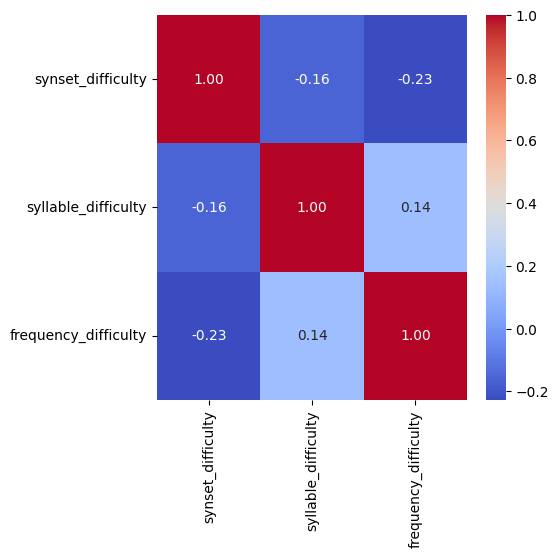

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# heatmap of synset_difficulty, syllable_difficulty, frequency_difficulty
plt.figure(figsize=(5, 5))
# values range from -1 to 1
sns.heatmap(df_unique_words[['synset_difficulty', 'syllable_difficulty', 'frequency_difficulty']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [42]:
df_unique_words['word_difficulty'] = df_unique_words['synset_difficulty'] + df_unique_words['syllable_difficulty'] + df_unique_words['frequency_difficulty']

# standardize
df_unique_words['word_difficulty'] = (df_unique_words['word_difficulty'] - df_unique_words['word_difficulty'].mean()) / df_unique_words['word_difficulty'].std()

df_unique_words['word_difficulty'].describe()

count    3.648600e+04
mean     2.843262e-17
std      1.000000e+00
min     -1.351800e+00
25%     -7.401087e-01
50%     -1.556753e-01
75%      5.882318e-01
max      1.895766e+01
Name: word_difficulty, dtype: float64

In [43]:
word_quantile_33 = df_unique_words['word_difficulty'].quantile(0.33)
word_quantile_67 = df_unique_words['word_difficulty'].quantile(0.67)

def classify_word_difficulty(difficulty):
    if difficulty < word_quantile_33:
        return 'easy'
    elif difficulty <= word_quantile_67:
        return 'medium'
    else:
        return 'hard'

df_unique_words['word_difficulty_class'] = df_unique_words['word_difficulty'].apply(classify_word_difficulty)

In [44]:
df_unique_words

,word,synset_difficulty,syllable_difficulty,frequency_difficulty,word_difficulty,word_difficulty_class
0,punch's,-0.547403,-1.171470,-0.359894,-1.311286,easy
1,einstein's,-0.547403,-0.225489,-0.420252,-0.752635,easy
2,command,2.302695,-0.225489,-0.424064,1.042802,hard
3,badonkadonk,-0.547403,1.666473,-0.306459,0.512595,hard
4,mental,0.640138,-0.225489,-0.424079,-0.005948,medium
...,...,...,...,...,...,...
36481,chugs,-0.072386,-1.171470,-0.406508,-1.041050,easy
36482,jab,0.877646,-1.171470,-0.422840,-0.452072,medium
36483,shakur,-0.547403,-0.225489,-0.418274,-0.751387,easy
36484,gates,1.352662,-0.225489,-0.423978,0.443576,hard


In [45]:
# save df_unique_words
df_unique_words.to_csv('../data/words_difficulty.csv', index=False)